####1) Create a function that reverses a string. For example, given the string "forward", your function should return "drawrof". Assume that all inputs are strings.

In [ ]:
def reverse_string(text):
  return text[::-1]

print(reverse_string("forward"))  

drawrof


####2) Complete the function below, which uses Bayes's theorem to calculate and return the posterior probability of an event A, given the known outcome of event B.


In [ ]:
def bayes(a, b_given_a, b_given_not_a):

    """
    Calculates P(A | B) using Bayes's theorem.

    Args:
        a: P(A)
        b_given_a: P(B | A)
        b_given_not_a: P(B | ~A)

    Returns:
        P(A | B)
    """
    not_a = 1 - a
    return (b_given_a * a)/((a * b_given_a) + (not_a * b_given_not_a))

print(bayes(.000001,.9999,.0001))  


0.009900019603999215


####3) Analyze the teams dataset from the Lahman baseball records. This dataset contains season statistics for each Major League Baseball team. You can get a description of the variables here.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# suppress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
records = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lahman-teams.csv')

print(records.shape)

records.head()

(2805, 48)


,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,NaN,NaN,N,NaN,401,1372,426,70,37,3,60,19.0,73.0,NaN,NaN,NaN,303,109,3.55,22,1,3,828,367,2,42,23,225,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,NaN,NaN,N,NaN,302,1196,323,52,21,10,60,22.0,69.0,NaN,NaN,NaN,241,77,2.76,25,0,1,753,308,6,28,22,218,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,NaN,NaN,N,NaN,249,1186,328,35,40,7,26,25.0,18.0,NaN,NaN,NaN,341,116,4.11,23,0,0,762,346,13,53,34,223,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,NaN,NaN,N,NaN,137,746,178,19,8,2,33,9.0,16.0,NaN,NaN,NaN,243,97,5.17,19,1,0,507,261,5,21,17,163,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,NaN,NaN,N,NaN,302,1404,403,43,21,1,33,15.0,46.0,NaN,NaN,NaN,313,121,3.72,32,1,0,879,373,7,42,22,227,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


#####a. For all records since 1995, plot histograms for the following three variables: stolen bases per game, wins, and earned run average. Which distribution do they appear to follow? Consider what each variable is measuring, as well as the histogram's shape.

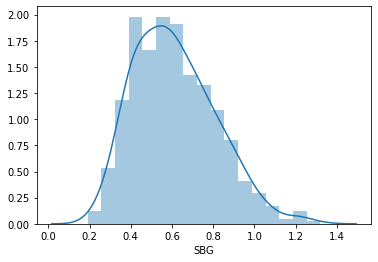

In [ ]:
recent_records = records.loc[records['yearID'] >= 1995]


recent_records = recent_records.assign(SBG = recent_records.SB / recent_records.G)

sns.distplot(recent_records["SBG"])
plt.show()

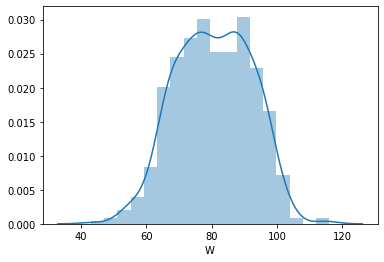

In [ ]:
sns.distplot(recent_records["W"])
plt.show()

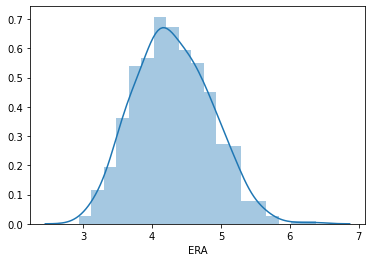

In [ ]:
sns.distplot(recent_records["ERA"])
plt.show()

All 3 variables appear to follow a normal distribution. 

#####b. Conduct some further exploratory data analysis on this dataset. Consider qualities like distributions, correlations, and trends over time. Try to find something interesting to say about the data, and use visualizations to support your argument.

In [ ]:
# group by year and look at means by category for trends
year = recent_records.groupby(['yearID']).mean()
year

,Rank,G,Ghome,W,L,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,attendance,BPF,PPF
yearID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1995,2.821429,144.071429,72.035714,72.000000,72.000000,698.357143,4948.964286,1320.535714,248.500000,29.428571,145.750000,508.571429,908.035714,104.750000,44.892857,NaN,NaN,698.357143,635.500000,4.447500,9.821429,7.285714,35.928571,3859.642857,1320.535714,145.750000,508.571429,908.035714,103.750000,137.000000,0.977500,1.802473e+06,100.357143,100.357143
1996,2.857143,161.928571,80.964286,80.928571,80.928571,815.392857,5600.035714,1511.428571,285.250000,30.535714,177.214286,574.750000,1046.714286,115.678571,47.964286,NaN,NaN,815.392857,742.178571,4.615714,10.357143,7.178571,39.857143,4345.035714,1511.428571,177.214286,574.750000,1046.714286,119.571429,155.464286,0.977143,2.146335e+06,100.321429,100.392857
1997,2.857143,161.857143,80.928571,80.928571,80.928571,771.571429,5551.357143,1481.107143,285.857143,31.535714,165.714286,559.500000,1069.178571,118.142857,55.857143,NaN,NaN,771.571429,704.392857,4.391429,9.500000,7.535714,40.678571,4333.535714,1481.035714,165.714286,559.464286,1069.035714,115.285714,151.892857,0.978214,2.256025e+06,100.035714,99.964286
1998,3.033333,162.133333,81.000000,81.000000,81.000000,776.566667,5570.533333,1482.966667,291.366667,29.966667,168.800000,548.233333,1063.100000,109.466667,50.166667,NaN,NaN,776.566667,712.766667,4.433667,10.066667,8.300000,42.166667,4342.900000,1482.966667,168.800000,548.233333,1063.100000,114.833333,150.000000,0.977000,2.353372e+06,100.100000,100.100000
1999,3.033333,161.866667,80.933333,80.900000,80.900000,823.033333,5571.200000,1510.900000,291.333333,31.033333,184.266667,596.366667,1037.300000,114.033333,50.633333,NaN,NaN,823.033333,751.933333,4.704000,7.866667,6.433333,40.566667,4319.866667,1510.900000,184.266667,596.366667,1037.300000,116.933333,154.133333,0.976333,2.337979e+06,100.400000,100.466667
2000,3.033333,161.933333,80.966667,80.933333,80.933333,832.366667,5576.333333,1508.200000,296.700000,31.733333,189.766667,607.900000,1045.200000,97.466667,44.100000,52.433333,50.466667,832.366667,762.533333,4.762333,7.800000,6.800000,39.266667,4324.433333,1508.200000,189.766667,607.900000,1045.200000,114.900000,157.033333,0.981100,2.378630e+06,100.233333,100.166667
2001,3.033333,161.933333,80.966667,80.933333,80.933333,773.300000,5541.133333,1462.633333,293.766667,30.933333,181.933333,526.866667,1080.133333,103.433333,46.933333,63.000000,47.466667,773.300000,707.166667,4.413000,6.633333,7.633333,40.333333,4328.733333,1462.633333,181.933333,526.866667,1080.133333,111.900000,147.833333,0.981600,2.419370e+06,100.400000,100.400000
2002,3.033333,161.733333,80.400000,80.833333,80.833333,746.933333,5519.400000,1442.400000,290.000000,30.700000,168.633333,541.533333,1046.466667,91.666667,42.733333,58.200000,46.633333,746.933333,684.233333,4.272000,7.133333,9.166667,40.800000,4326.900000,1442.400000,168.633333,541.533333,1046.466667,107.500000,152.166667,0.982400,2.264813e+06,100.133333,100.233333
2003,3.033333,162.000000,81.000000,80.966667,80.966667,765.933333,5557.900000,1468.566667,294.233333,31.133333,173.566667,529.633333,1026.700000,85.766667,37.733333,61.633333,44.533333,765.933333,705.100000,4.395667,6.966667,8.633333,39.933333,4333.533333,1468.566667,173.566667,529.633333,1026.700000,105.700000,152.600000,0.982700,2.254335e+06,100.000000,100.100000


Two columns stand out after looking at the yearly mean trends. It appears that "CG" (complete games by pitchers) has decreased steadily since 1995. Mean complete games pitched peaked in 1996 at 10.36 and was at its lowest in 2015 at 3.47 games. 

On the other hand "SHO" or pitched shutouts steadily increased from 1995 to 2015. Shoutouts peaked in 2014 with an average of 11.77 that year and hit their valley in 1999 with an average of 6.43. 

These two pitching categories seem inveresly related. We will explore this relationship further. 

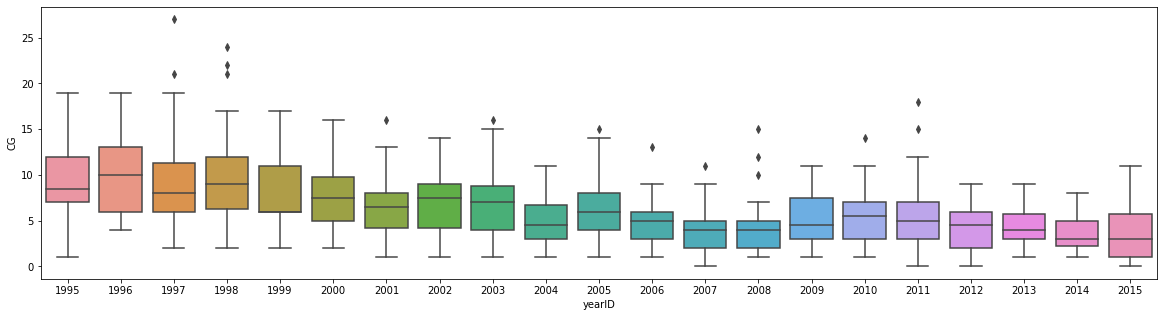

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x="yearID",y='CG', data=recent_records)
plt.show()

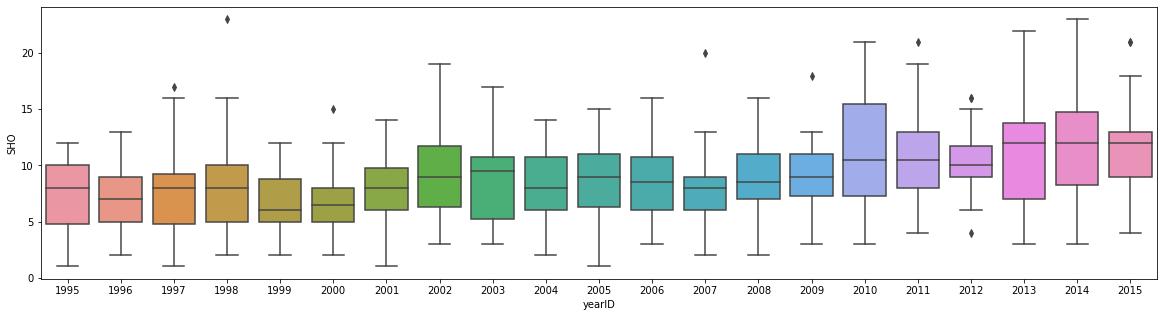

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x="yearID",y='SHO', data=recent_records)
plt.show()

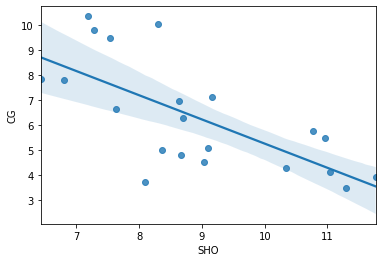

In [ ]:
#sns.distplot(year["CG"], bins=10, kde=False)
sns.regplot(x="SHO",y="CG", data=year)
plt.show()

In [ ]:
year[['CG','SHO']].corr()

,CG,SHO
CG,1.000000,-0.688069
SHO,-0.688069,1.000000


The regression plot shows the inverse relationship we expected. We do see a -0.69 correlation betweeen complete games pitched and shutouts. So as teams have gone away from having their pitchers throw complete games, shutouts have increased.  

####4) Choose any two of the variables from the previous question. Draw 1,000 samples, taking the mean of 100 observations each time. Plot the frequencies of the sample means. What distribution does this appear to follow?

Hint: df['col'].sample(n=50) will draw 50 random observations from df['col'].

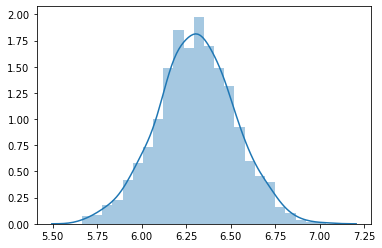

In [ ]:
complete_games = [year['CG'].sample(n = 100, replace = True).mean() for i in range(1000)]
sns.distplot(complete_games)
plt.show()

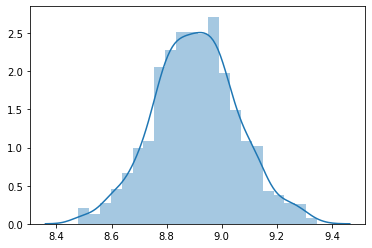

In [ ]:
shutouts = [year['SHO'].sample(n = 100, replace = True).mean() for i in range(1000)]
sns.distplot(shutouts)
plt.show()

Both samples of complete game ('CG') and shutouts ('SHO') appear to follow a normal distribution. 